# Histograma

Permite ver la distribucion empirica de una variable continua. En python se hace con matplotlib 
plt.histplot()

# Datos perdidos

Son los datos nulos, y los obtienen con .isnull()

# Variables aleatorias

Es una funcion que mapea un resultado de un espacio muestral discreto (resultados de un dado, azul,
 rojo, etc) a uno de numeros.

# Distribucion Normal

Se define con la media y la desviacion estandar, y se puede crear completamente. Se puede ver la 
funcion de densidad y la funcion acumulada. 

La probabilidad de obtener solamente un unico valor en la distribucion normal es 0!. Sin embargo, 
si uno pregunta por un rango, ahi si se obtiene una probabilidad.

# Transformacion de datos

Algunos datos no obedecen a una distribucion normal. Debido a lo anterior, estos se trasnforman
mediante una funcion (Ej: Logaritmo, 1/x, etc) y usualmente se obtiene una distribucion normal.

# Distribucion normal estandarizada

Cualquier distribucion normal (independiente de su media o desviacion estandar) se puede transformar
a una distribucion normal estandarizada.

# Puntaje Z

Permite analizar el comportamiento especifico de una observacion con respecto a la media y
desviacion estandar. Se calcula con:

z = (obs - media) / desv estandar

Permite detectar outliers! Y permite homogenizar variables y compararlas entre si.

# Variables aleatorias discretas

La mas importante es la distribucion binomial. Nos permite resumir una variable discreta segun
el conteo y la frecuencia de los eventos. 

## Ensayo de Bernoulli

Es solamente una iteracion, y el evento debe ser binario (si/no, cara/sello, etc). No entendi muy
bien esto la verdad. Se tiene mu y sigma. En scipy.stats se puede obtener a mu (media) y sigma 
(std), requiere solamente 1 valor. 1 ensayo bernoulli es lanzar 1 vez 1 moneda. 2 ensayos bernoulli
es lanzar 2 veces 1 moneda (y ambos eventos son independientes).

In [11]:
from scipy.stats import bernoulli

# La funcion bernoulli recibe mu
mu, sigma = bernoulli.stats(0.7)

# Binomial

Con np.random.binomial se pueden simular ensayos bernoulli. La binomial converge a la distribucion
normal!

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Size corresponde a la cantidad de experimentos, o puntos que se van a graficar 
# n es la cantidad de eventos que se van a realizar dentro de cada experimento (cada experimento tendra 1000 lanzadas de monedas)


# Size: Cantidad de datos a simular
# n: Cantdad de eventos que ocurren en cada ensayo/experimento
np.random.binomial(size=1, n=1000, p=0.8)

# un ensayo bernoulli es un caso especial de la binomial, ya que es cuando dentro de un experimento
# se realiza solamente un unico evento

array([782])

(array([   9.,   46.,  321.,  952., 2107., 3841., 1940.,  633.,  136.,
          15.]),
 array([63. , 66.2, 69.4, 72.6, 75.8, 79. , 82.2, 85.4, 88.6, 91.8, 95. ]),
 <BarContainer object of 10 artists>)

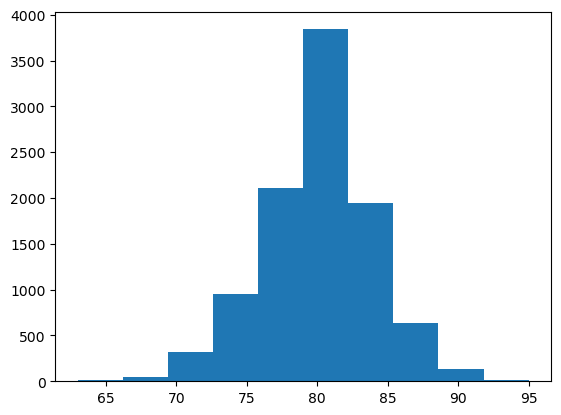

In [18]:
# En este caso, serian 100 monedas distintas, donde cada una se tira 100 veces, y la probabilidad
# de que se obtenga cara es del 80%. En terminos estadisticos, es probable que en cada experimento
# se obtengan alrededor de 80 caras!.
x = np.random.binomial(size=10000, n=100, p=0.8)
plt.hist(x)

(array([  57.,  218., 1347., 2164., 2534., 2479.,  877.,  286.,   34.,
           4.]),
 array([15. , 18.4, 21.8, 25.2, 28.6, 32. , 35.4, 38.8, 42.2, 45.6, 49. ]),
 <BarContainer object of 10 artists>)

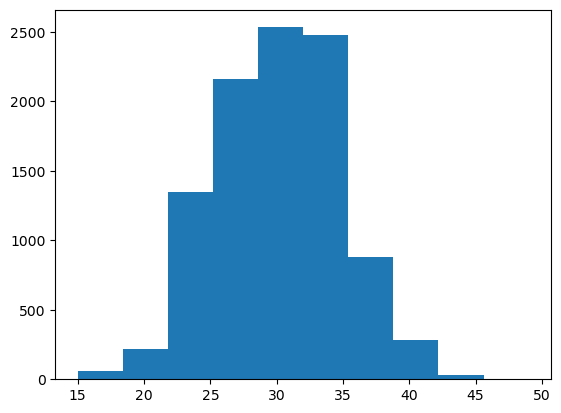

In [20]:
# Si uno cambia la probabilidad del evento, entonces la distribucion normal cambia su eje x.
# En el caso anterior, es mas probable que la cantidad de las caras sea cerca del 30% (y asi cambia
# el grafico)
x = np.random.binomial(size=10000, n=100, p=0.3)
plt.hist(x)

# Asintotico

Esto significa que el tamano de la muestra tiende a infinito (un numero infinito de experimentos/
monedas por tirar, o numero de eventos por experimento).

# Ley de los grandes numeros

Entre mas datos/experimentos se hagan, entonces mas se acercara la media empirica a la media
teorica. Si tengo infinitos ensayos (asintoticamente), entonces la media empirica sera la media
teorica!

# Teorema del Limite Central

Es super central para la inferencia estadistica, pero ni idea que weas. Si tenemos un promedio y le
restamos la media y lo dividimos por la desv estandar/la cantidad de experimentos, entonces eso
tiende a una distribucion normal!

Ej:


```python
mu, sigma = bernoulli.stats(0.65)

tamano_muestra = 100
ensayos = np.random.binomial(size=tamano_muestra, n=1, p=0.65)

calculo_limite_central = (np.mean(ensayos) - mu) / (np.std(ensayos) / tamano_muestra)

```

# Seaborn

Permite centrarse mas en el analisis que en escribir el codigo!

## Graficar histogramas

- Se hace con sns.distplot(). Si se agrega el argumento rug, entonces se agregan los datos que se estan graficando!. Lo fome es que se va a dejar de utilizar. Por lo tanto, es mejor graficar un histplot y un kdeplot en un mismo eje

## Subplots

# Correlaciones - Relacion entre variables

Recordemos que la correlacion no tiene nada que ver con la causalidad!. Puede que dos variables
esten correlacionadas, pero que no tengan causalidad. 

# Test de Hipotesis - Rechazo o No rechazo hipotesis



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import lec4_graphs

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 5)

In [25]:
df = pd.read_csv('qog_std_cs_jan18.csv')

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='undp_hdi', ylabel='Density'>

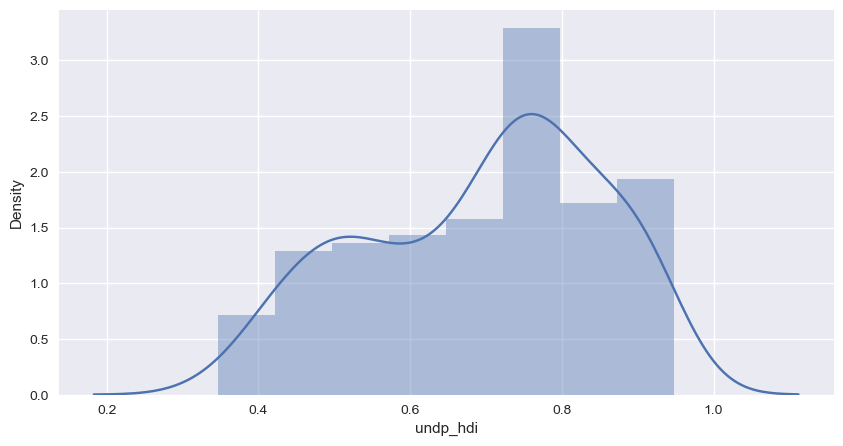

In [30]:
sns.distplot(df['undp_hdi'])

<AxesSubplot:xlabel='undp_hdi', ylabel='Density'>

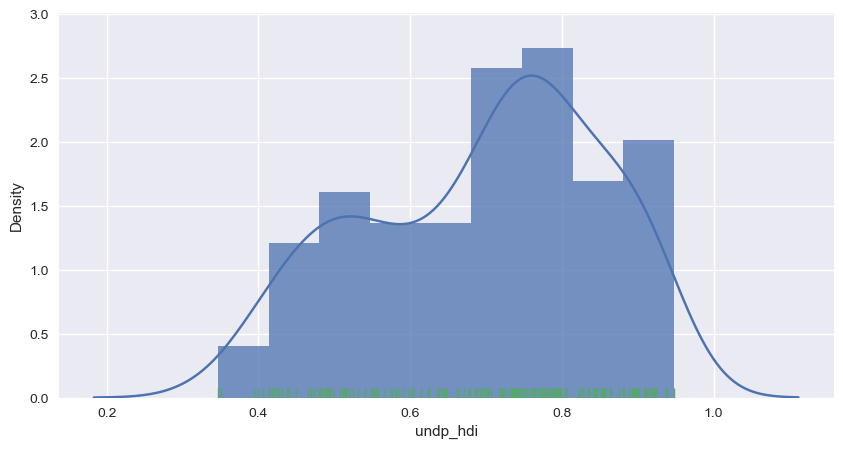

In [46]:
fig, axis = plt.subplots()
sns.histplot(df['undp_hdi'].dropna(), stat='density', ax=axis, lw=0)
sns.kdeplot(df['undp_hdi'].dropna(), ax=axis)
sns.rugplot(df['undp_hdi'].dropna(), ax=axis)

# Conteo de frecuencias

Con seaborn se puede hacer con la funcion sns.countplot(). Con el parametro order se pueden ordenar los datos!

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cname', ylabel='count'>

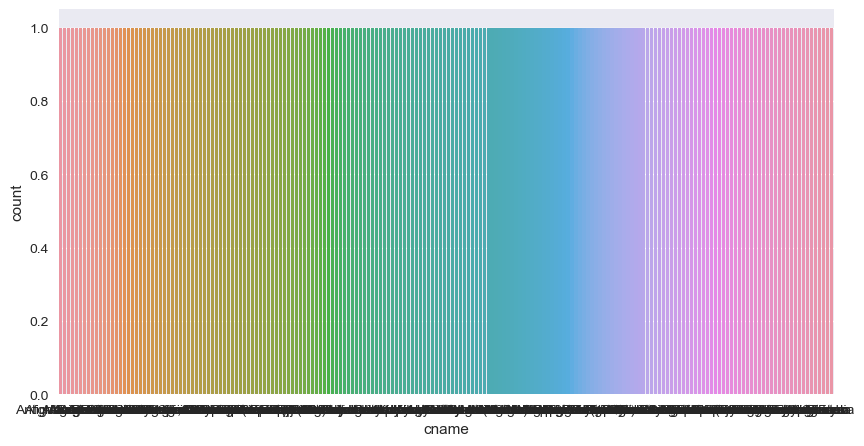

In [50]:
sns.countplot(df['cname'])

In [49]:
df

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,860,Uzbekistan,UZB,704.0,860.0,QoGStdCSJan18,NaN,NaN,21.0,16.0,...,3.247667,2.191377,2.171875,4.076407,7.888145,5.364856,3.950634,NaN,NaN,0.140921
190,862,Venezuela,VEN,101.0,862.0,QoGStdCSJan18,NaN,NaN,20.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,882,Samoa,WSM,990.0,882.0,QoGStdCSJan18,NaN,NaN,10.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,887,Yemen,YEM,679.0,887.0,QoGStdCSJan18,NaN,NaN,26.0,16.0,...,3.598178,1.697442,3.752032,4.671357,5.887310,3.384707,3.892000,-0.591479,-0.875164,0.403987
